<a href="https://colab.research.google.com/github/Patriciangugi/dsc-probability-mass-function/blob/master/The_Probability_Mass_Function_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
size_and_count = {17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4}

In [5]:
import numpy as np
import pandas as pd

total_classes = sum(size_and_count.values())
sizes = pd.Series(list(size_and_count.keys()))
pmf_values = pd.Series(list(size_and_count.values())) / total_classes

pmf_df = pd.DataFrame({
    "Class Size": sizes,
    "Overall Probability": pmf_values
})
# Call hide_index on the DataFrame, not the Styler object
pmf_df.hide_index()

AttributeError: 'DataFrame' object has no attribute 'hide_index'

In [9]:
# Compute the mean class size
mean_class_size = (pmf_df['Class Size'] * pmf_df['Overall Probability']).sum()
print(f"Mean Class Size: {mean_class_size:.2f}")


Mean Class Size: 32.47


In [7]:
# Assuming you want to sum the probabilities in the pmf_df DataFrame
pmf_df["Overall Probability"].sum()

1.0

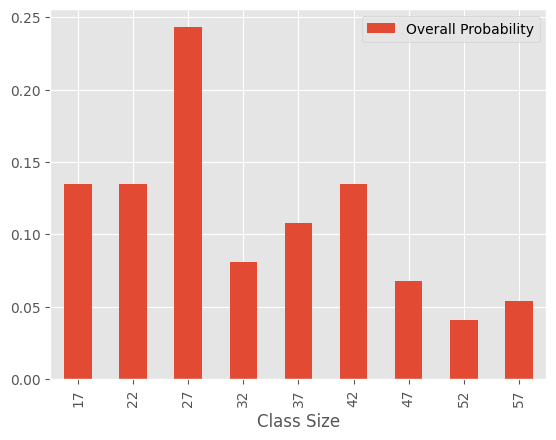

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pmf_df.plot.bar(x="Class Size", y="Overall Probability");

In [10]:
def p_actual(x_i):
    global size_and_count
    global total_classes

    if x_i in size_and_count:
        return size_and_count[x_i] / total_classes
    else:
        return 0.0
print(p_actual(17))

0.13513513513513514


In [12]:
size_and_count = {17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4}

total_classes = sum(size_and_count.values())
sizes = pd.Series(list(size_and_count.keys()))

pmf_values = pd.Series(list(size_and_count.values())) / total_classes

mu = (sizes * pmf_values).sum()

print(f"mu: {mu:.5f}")

mu: 32.47297


In [13]:
biased = sizes.apply(p_actual) * sizes
biased

0    2.297297
1    2.972973
2    6.567568
3    2.594595
4    4.000000
5    5.675676
6    3.175676
7    2.108108
8    3.081081
dtype: float64

In [14]:
biased_pmf = pd.Series([value/mu for value in biased])
biased_pmf

0    0.070745
1    0.091552
2    0.202247
3    0.079900
4    0.123179
5    0.174782
6    0.097794
7    0.064919
8    0.094881
dtype: float64

In [15]:
pmf_df["Perceived Probability"] = biased_pmf
pmf_df

,Class Size,Overall Probability,Perceived Probability
0,17,0.135135,0.070745
1,22,0.135135,0.091552
2,27,0.243243,0.202247
3,32,0.081081,0.079900
4,37,0.108108,0.123179
5,42,0.135135,0.174782
6,47,0.067568,0.097794
7,52,0.040541,0.064919
8,57,0.054054,0.094881


In [16]:
def p_perceived(x_i):
    return p_actual(x_i)*x_i / mu

p_perceived(17)

0.07074490220557636

In [23]:
import pandas as pd
size_and_count = {17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4}

total_classes = sum(size_and_count.values())

sizes = pd.Series(list(size_and_count.keys()))

p_perceived = pd.Series([0.05, 0.05, 0.15, 0.25, 0.15, 0.15, 0.10, 0.05, 0.05])

mu_biased = (sizes * p_perceived).sum()

print(f"Expected Value (Biased Mean Class Size): {mu_biased:.5f}")

Expected Value (Biased Mean Class Size): 36.00000


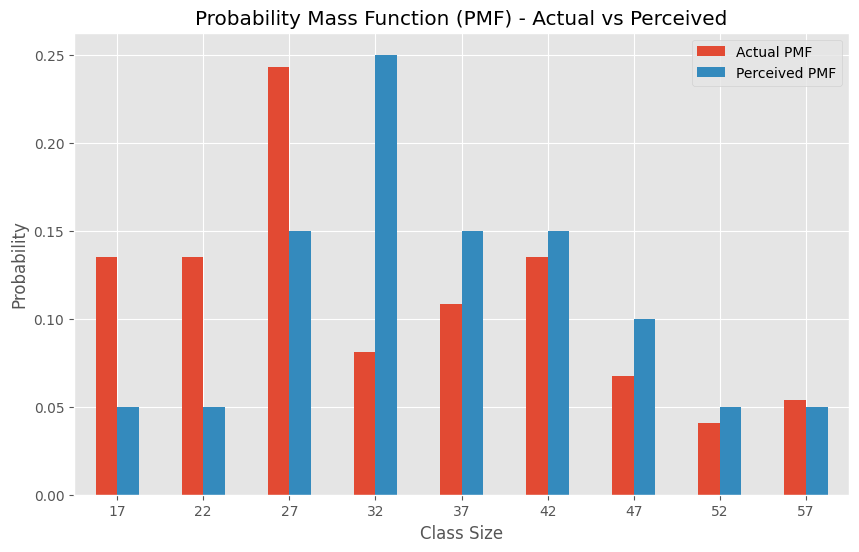

In [25]:
pmf_values_actual = pd.Series([count / total_classes for count in size_and_count.values()])

pmf_df = pd.DataFrame({
    "Class Size": sizes,
    "Actual PMF": pmf_values_actual,  # Use the calculated actual PMF values
    "Perceived PMF": p_perceived
})

# Rest of the plotting code remains the same
pmf_df.set_index("Class Size").plot(kind='bar', figsize=(10, 6))
plt.title('Probability Mass Function (PMF) - Actual vs Perceived')
plt.xlabel('Class Size')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.show()